In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
def load_data():
    df=pd.read_csv('../files/input/shipping-data.csv')
    return df

In [4]:
def create_visual_for_shipping_per_warehouse(df):
    df=df.copy()
    plt.figure()
    counts=df.Warehouse_block.value_counts()
    counts.plot.bar(
        title='Shipping per Warehouse',
        xlabel='Warehouse block',
        ylabel='Record Count',
        color='tab:blue',
        fontsize=8,
    )
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.savefig('../files/docs/shipping_per_warehouse.png')

In [5]:
def create_visual_for_mode_of_shipment(df):
    df=df.copy()
    plt.figure()
    counts=df.Mode_of_Shipment.value_counts()
    counts.plot.pie(
        title='Mode Of Shipment',
        wedgeprops=dict(width=0.35), #35% del grafico
        ylabel='',
        colors=['tab:blue','tab:orange','tab:green'],
    )
    plt.savefig('../files/docs/mode_of_shipment.png')

In [19]:
def create_visual_for_average_customer_raiting(df):
    df=df.copy()
    plt.figure()
    df=(
        df[['Mode_of_Shipment','Customer_rating']].groupby('Mode_of_Shipment').describe()
    )
    df.columns=df.columns.droplevel()
    df=df[['mean','min','max']]
    plt.barh(
        y=df.index.values,
        width=df['max'].values-1,
        left=df['min'].values,
        height=0.9,
        color='lightgray',
        alpha=0.8, 
        )
    colors=[
        'tab:green' if value >= 3 else 'tab:orange' for value in df['mean'].values
    ]
    plt.barh(
        y=df.index.values,
        width=df['mean'].values-1,
        left=df['min'].values,
        color=colors,
        height=0.5,
        alpha=1, 
    )
    plt.title('Average Customer Rating')
    plt.gca().spines['left'].set_color('gray')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color('gray')      
  
    plt.savefig('../files/docs/average_customer_rating.png')
#

In [21]:
def create_visual_for_weight_distribution(df):
    df=df.copy()
    plt.figure()
    df.Weight_in_gms.plot.hist(
        title='Shipped Weight Distribution',
        color='tab:orange',
        edgecolor='white',
    )
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.savefig('../files/docs/weight_distribution.png')

In [7]:
df = load_data()

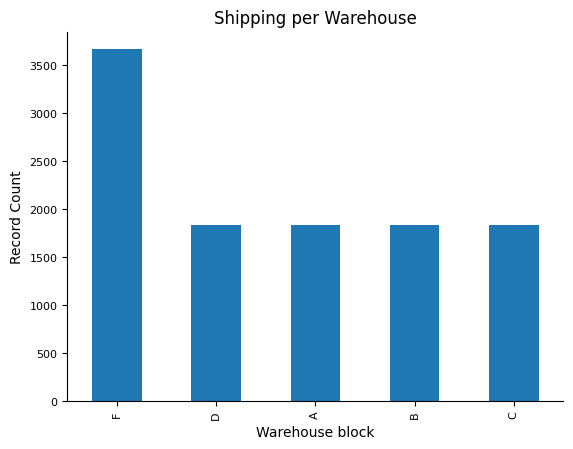

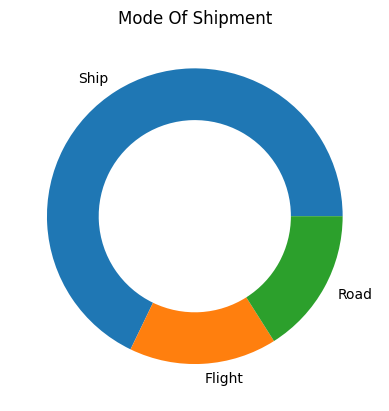

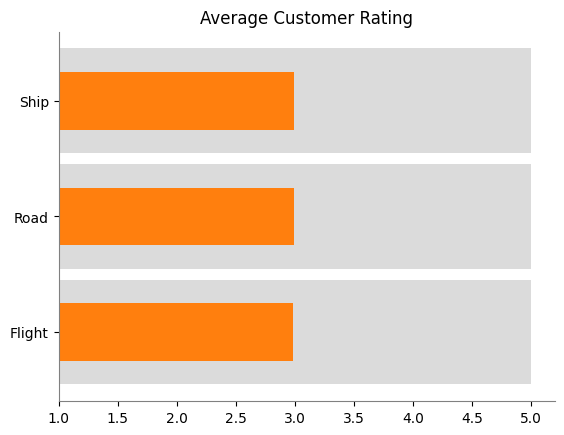

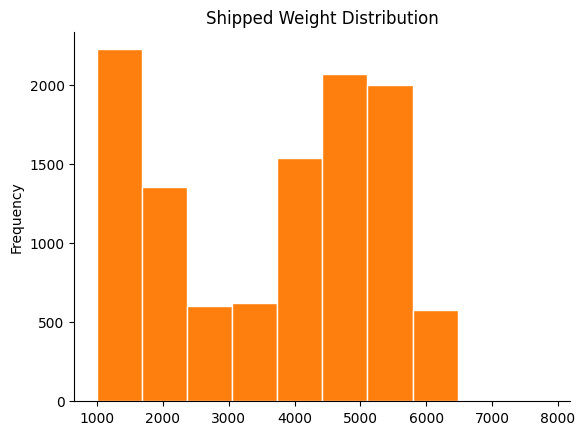

In [22]:
create_visual_for_shipping_per_warehouse(df)
create_visual_for_mode_of_shipment(df)
create_visual_for_average_customer_raiting(df)
create_visual_for_weight_distribution(df)